In [1]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


<Axes: >

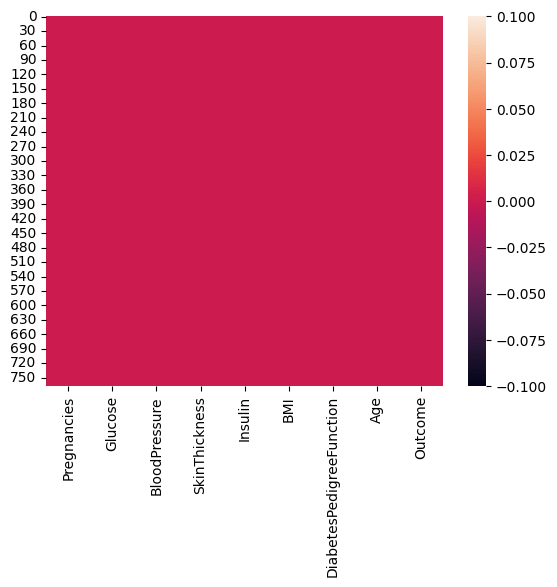

In [53]:
sns.heatmap(df.isnull())

In [54]:
df.describe().columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [78]:
correlation = df.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

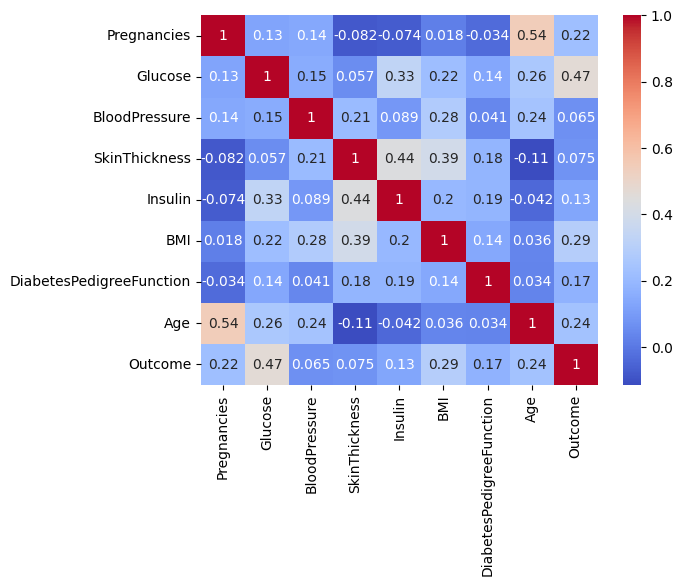

In [79]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [55]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [56]:
target = "Outcome"


In [57]:
df_model = df[features + [target]].copy()

In [58]:
df_model

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [59]:
X = df_model[features]

In [60]:
y = df[target]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
len(X_train)

614

In [63]:
models = {
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.01, 0.1, 1, 10],  # regularization strength
            "penalty": ["l2"],
            "solver": ["liblinear"]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [3, 5, 10],
            "min_samples_split": [2, 5]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [5, 10]
        }
    }
}

In [64]:
best_models = []

In [65]:
for name, config in models.items():
    print(f"Training {name} model...")

    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    best_models.append({
        "model": name,
        "best_params": grid.best_params_,
        "rmse": rmse,
        "r2": r2
    })

Training LogisticRegression model...
Training DecisionTree model...
Training RandomForest model...


In [66]:
results_df = pd.DataFrame(best_models) 

In [67]:
results_df.sort_values(by='rmse')

,model,best_params,rmse,r2
0,LogisticRegression,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.490163,-0.046465
1,DecisionTree,"{'max_depth': 3, 'min_samples_split': 2}",0.490163,-0.046465
2,RandomForest,"{'max_depth': 5, 'n_estimators': 50}",0.496743,-0.074747


In [69]:
import joblib

best_row = results_df.sort_values(by='rmse').iloc[0]


In [70]:
best_row


model                                         LogisticRegression
best_params    {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
rmse                                                    0.490163
r2                                                     -0.046465
Name: 0, dtype: object

In [71]:
best_models_name = best_row['model']
best_models_config = models[best_models_name]

In [72]:
final_model = best_models_config['model'].set_params(**best_row['best_params'])

In [73]:
final_model.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [74]:

joblib.dump(final_model, 'diabetes_prediction_model.pkl')

['diabetes_prediction_model.pkl']

In [76]:
joblib.load('diabetes_prediction_model.pkl').predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [82]:
y_pred = final_model.predict(X_test)



In [83]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7857142857142857
